In [37]:
%matplotlib notebook

In [38]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

In [39]:
#creating dataframe from csv
carbon_emissions_df = pd.read_csv (r'C:\Users\mgian\Desktop\Data_Class\Project 3\Carbon_Emissions.csv')
carbon_emissions_df.head()

,MSN,YYYYMM,Month,Year,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,1,1973,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,2,1973,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,3,1973,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,4,1973,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,5,1973,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [40]:
#creating new dataframe with significant columns
new_carbon_emissions_df = carbon_emissions_df[['YYYYMM', 'Month', 'Year', 'Value', 'Description', 'Unit']]
new_carbon_emissions_df.head()

,YYYYMM,Month,Year,Value,Description,Unit
0,197301,1,1973,72.076,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,197302,2,1973,64.442,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,197303,3,1973,64.084,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,197304,4,1973,60.842,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,197305,5,1973,61.798,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [41]:
#to see how many rows there are in this dataframe
print(len(new_carbon_emissions_df))

4678


In [42]:
#grab anything in the Month column that has the month of 13
#*13 is total for the year
year_total_value_df = new_carbon_emissions_df.loc[new_carbon_emissions_df['Month'] == 13]
year_total_value_df

,YYYYMM,Month,Year,Value,Description,Unit
12,197313,13,1973,811.791,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
25,197413,13,1974,800.131,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
38,197513,13,1975,823.740,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
51,197613,13,1976,911.346,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
64,197713,13,1977,962.143,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
...,...,...,...,...,...,...
4618,201113,13,2011,2169.731,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4631,201213,13,2012,2034.367,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4644,201313,13,2013,2049.895,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4657,201413,13,2014,2049.902,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [43]:
#Break out by description - Coal Electric Power Sector CO2 Emissions
coal_electric_emissions_df = year_total_value_df.loc[year_total_value_df['Description'] == 'Coal Electric Power Sector CO2 Emissions']
coal_electric_emissions_df.head()

,YYYYMM,Month,Year,Value,Description,Unit
12,197313,13,1973,811.791,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
25,197413,13,1974,800.131,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
38,197513,13,1975,823.740,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
51,197613,13,1976,911.346,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
64,197713,13,1977,962.143,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [44]:
#Check to see how many rows are in this dataframe
print(len(coal_electric_emissions_df))

43


In [45]:
#Sum the Value column to show how many CO2 emissions from Coal Electric Power Sector over 40 years
column_value = "Value"
total_coal_electric_value = coal_electric_emissions_df[column_value].sum()
print(total_coal_electric_value)

65097.996


In [46]:
#realized that it was listing the number and not summing it
#checked for dtype
coal_electric_emissions_df.Value.dtype

dtype('float64')

In [47]:
#changed it to a float
coal_electric_emissions_df["Value"] = coal_electric_emissions_df["Value"].astype(float)

<ipython-input-47-f0ca5808ea25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coal_electric_emissions_df["Value"] = coal_electric_emissions_df["Value"].astype(float)


In [48]:
#sum the value column
column_value = "Value"
total_coal_electric_value = coal_electric_emissions_df[column_value].sum()
print(total_coal_electric_value)

65097.996


In [49]:
#delete nan from dataframe - havigng issue converting string to float
year_total_value_df = year_total_value_df.replace(r'^\s*$', np.nan, regex=True)

In [50]:
#create dataframe for oil electric power sector CO2 emissions
oil_electric_emissions_df = year_total_value_df.loc[year_total_value_df['Description'] == 'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions']
oil_electric_emissions_df.head()

,YYYYMM,Month,Year,Value,Description,Unit
1144,197313,13,1973,19.914,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
1157,197413,13,1974,22.525,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
1170,197513,13,1975,16.509,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
1183,197613,13,1976,17.738,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
1196,197713,13,1977,20.671,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide


In [51]:
total_oil_electric_value = oil_electric_emissions_df["Value"].sum()
print(total_oil_electric_value)

402.52400000000006


In [52]:
oil_electric_emissions_df.Value.dtype

dtype('float64')

In [53]:
#changed it to a float
oil_electric_emissions_df["Value"] = oil_electric_emissions_df["Value"].astype(float)

<ipython-input-53-35c0d28c842e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_electric_emissions_df["Value"] = oil_electric_emissions_df["Value"].astype(float)


In [54]:
total_oil_electric_value = oil_electric_emissions_df["Value"].sum()
print(total_oil_electric_value)

402.52400000000006


In [55]:
#create dataframe for oil electric power sector CO2 emissions
geo_electric_emissions_df = year_total_value_df.loc[year_total_value_df['Description'] == 'Geothermal Energy Electric Power Sector CO2 Emissions']
geo_electric_emissions_df.head()

,YYYYMM,Month,Year,Value,Description,Unit
3408,198913,13,1989,0.363,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
3421,199013,13,1990,0.384,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
3434,199113,13,1991,0.398,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
3447,199213,13,1992,0.400,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
3460,199313,13,1993,0.415,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide


In [56]:
#changing to a float so that I can sum the column
geo_electric_emissions_df["Value"] = geo_electric_emissions_df["Value"].astype("float")

<ipython-input-56-8064c8063fbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_electric_emissions_df["Value"] = geo_electric_emissions_df["Value"].astype("float")


In [57]:
#sum of geothermal energy emissions
total_geo_electric_value = geo_electric_emissions_df["Value"].sum()
print(total_geo_electric_value)

10.322999999999999


In [58]:
#create dataframe for oil electric power sector CO2 emissions
naturalgas_electric_emissions_df = year_total_value_df.loc[year_total_value_df['Description'] == 'Natural Gas Electric Power Sector CO2 Emissions']
naturalgas_electric_emissions_df.head()

,YYYYMM,Month,Year,Value,Description,Unit
578,197313,13,1973,198.857,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
591,197413,13,1974,186.716,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
604,197513,13,1975,171.891,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
617,197613,13,1976,167.220,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
630,197713,13,1977,174.225,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [59]:
#changing to a float so that I can sum the column
naturalgas_electric_emissions_df["Value"] = naturalgas_electric_emissions_df["Value"].astype("float")

<ipython-input-59-da683e7740d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naturalgas_electric_emissions_df["Value"] = naturalgas_electric_emissions_df["Value"].astype("float")


In [60]:
#sum of  energy emissions
total_naturalgas_electric_value = naturalgas_electric_emissions_df["Value"].sum()
print(total_naturalgas_electric_value)

10975.557999999999


In [61]:
#create dataframe for biomass electric power sector CO2 emissions
nonbiomass_electric_emissions_df = year_total_value_df.loc[year_total_value_df['Description'] == 'Non-Biomass Waste Electric Power Sector CO2 Emissions']
nonbiomass_electric_emissions_df.head()

,YYYYMM,Month,Year,Value,Description,Unit
3766,198913,13,1989,4.366,Non-Biomass Waste Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
3779,199013,13,1990,5.795,Non-Biomass Waste Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
3792,199113,13,1991,7.207,Non-Biomass Waste Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
3805,199213,13,1992,8.476,Non-Biomass Waste Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
3818,199313,13,1993,8.592,Non-Biomass Waste Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide


In [62]:
#changing to a float so that I can sum the column
nonbiomass_electric_emissions_df["Value"] = nonbiomass_electric_emissions_df["Value"].astype("float")

<ipython-input-62-508811e8d588>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonbiomass_electric_emissions_df["Value"] = nonbiomass_electric_emissions_df["Value"].astype("float")


In [63]:
#sum of nonbiomass energy emissions
total_nonbiomass_electric_value = nonbiomass_electric_emissions_df["Value"].sum()
print(total_nonbiomass_electric_value)

274.894


In [64]:
#create dataframe for petroleum electric power sector CO2 emissions
petroleum_electric_emissions_df = year_total_value_df.loc[year_total_value_df['Description'] == 'Petroleum Coke Electric Power Sector CO2 Emissions']
petroleum_electric_emissions_df.head()

,YYYYMM,Month,Year,Value,Description,Unit
1710,197313,13,1973,1.559,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide
1723,197413,13,1974,1.922,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide
1736,197513,13,1975,0.216,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide
1749,197613,13,1976,0.209,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide
1762,197713,13,1977,0.300,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide


In [65]:
#changing to a float so that I can sum the column
petroleum_electric_emissions_df["Value"] = petroleum_electric_emissions_df["Value"].astype("float")

<ipython-input-65-1b397b06de20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petroleum_electric_emissions_df["Value"] = petroleum_electric_emissions_df["Value"].astype("float")


In [66]:
#sum of petroleum energy emissions
total_petroleum_electric_value = petroleum_electric_emissions_df["Value"].sum()
print(total_petroleum_electric_value)

331.49600000000004


In [67]:
#create dataframe for residual electric power sector CO2 emissions
residual_electric_emissions_df = year_total_value_df.loc[year_total_value_df['Description'] == 'Residual Fuel Oil Electric Power Sector CO2 Emissions']
residual_electric_emissions_df.head()

,YYYYMM,Month,Year,Value,Description,Unit
2276,197313,13,1973,254.231,Residual Fuel Oil Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
2289,197413,13,1974,239.348,Residual Fuel Oil Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
2302,197513,13,1975,231.459,Residual Fuel Oil Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
2315,197613,13,1976,254.671,Residual Fuel Oil Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
2328,197713,13,1977,284.787,Residual Fuel Oil Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide


In [68]:
#changing to float so that I can sum the column
residual_electric_emissions_df["Value"] = residual_electric_emissions_df["Value"].astype("float")

<ipython-input-68-c01158d1519d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residual_electric_emissions_df["Value"] = residual_electric_emissions_df["Value"].astype("float")


In [69]:
#sum of residual energy emissions
total_residual_electric_value = residual_electric_emissions_df["Value"].sum()
print(total_residual_electric_value)

4236.099000000001


In [70]:
#Check to see how many rows are in this dataframe
print(len(residual_electric_emissions_df))

43


<IPython.core.display.Javascript object>


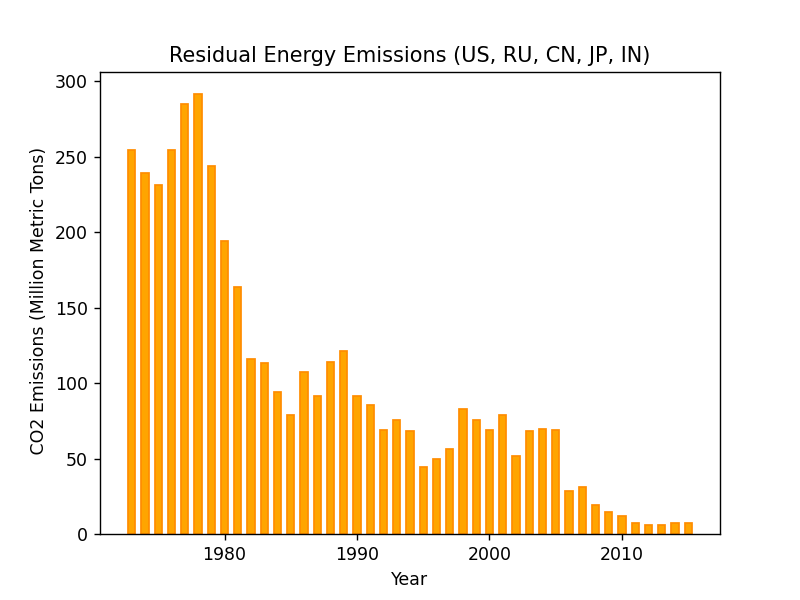

In [116]:
# residual_electric_emissions_df.plot(
#     kind='scatter', 
#     x= residual_electric_emissions_df["Year"], 
#     y='Value', 
#     ylabel='Emissions', 
#     title='Residual Energy Emissions (US, RU, CN, JP, IN)',
#     colors = np.random.randint(43, size=(43)),
#     alpha=0.5
#     )

# colors = np.random.randint(43, size=(43))

# plt.scatter(x, y, c=colors, s=sizes, alpha=0.5)

plt.figure(1)
x = residual_electric_emissions_df["Year"]
y = residual_electric_emissions_df["Value"]
plt.bar(x, y, color = 'orange', edgecolor = 'darkorange', width = .55)
plt.xlabel("Year")
plt.ylabel(' CO2 Emissions (Million Metric Tons)')
plt.title('Residual Energy Emissions (US, RU, CN, JP, IN)')
plt.show()
# plt.savefig('Residual_Energy_Emissions.png')

<IPython.core.display.Javascript object>


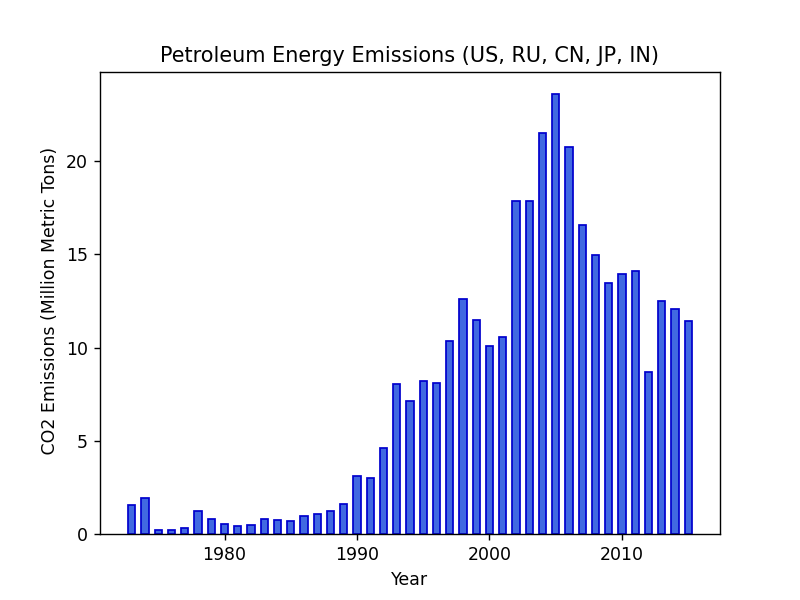

In [119]:
plt.figure(2)
x = petroleum_electric_emissions_df["Year"]
y = petroleum_electric_emissions_df["Value"]
plt.bar(x, y, color = 'royalblue', edgecolor = 'mediumblue', width = .55)
plt.xlabel("Year")
plt.ylabel(' CO2 Emissions (Million Metric Tons)')
plt.title('Petroleum Energy Emissions (US, RU, CN, JP, IN)')
plt.show()

<IPython.core.display.Javascript object>


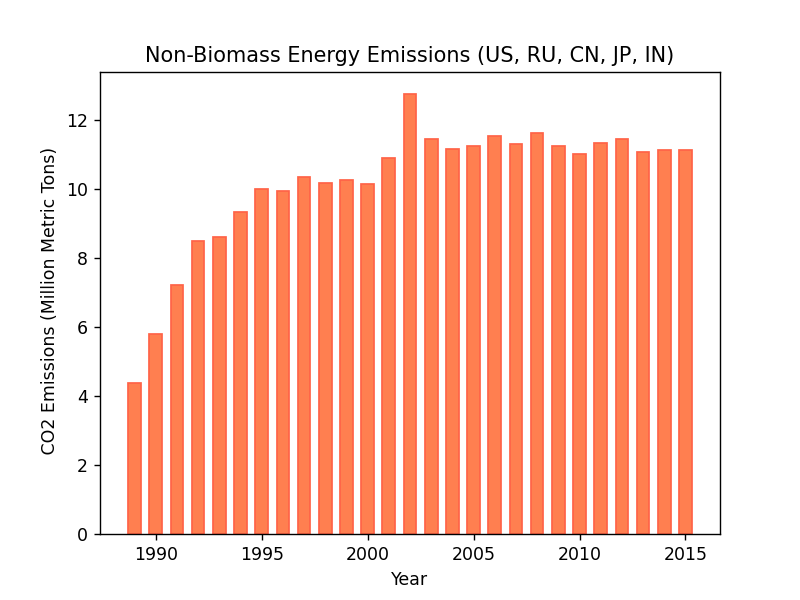

In [138]:
plt.figure(3)
x = nonbiomass_electric_emissions_df["Year"]
y = nonbiomass_electric_emissions_df["Value"]
plt.bar(x, y, color = 'coral', edgecolor = 'tomato', width = .60)
plt.xlabel("Year")
plt.ylabel(' CO2 Emissions (Million Metric Tons)')
plt.title('Non-Biomass Energy Emissions (US, RU, CN, JP, IN)')
plt.show()

<IPython.core.display.Javascript object>


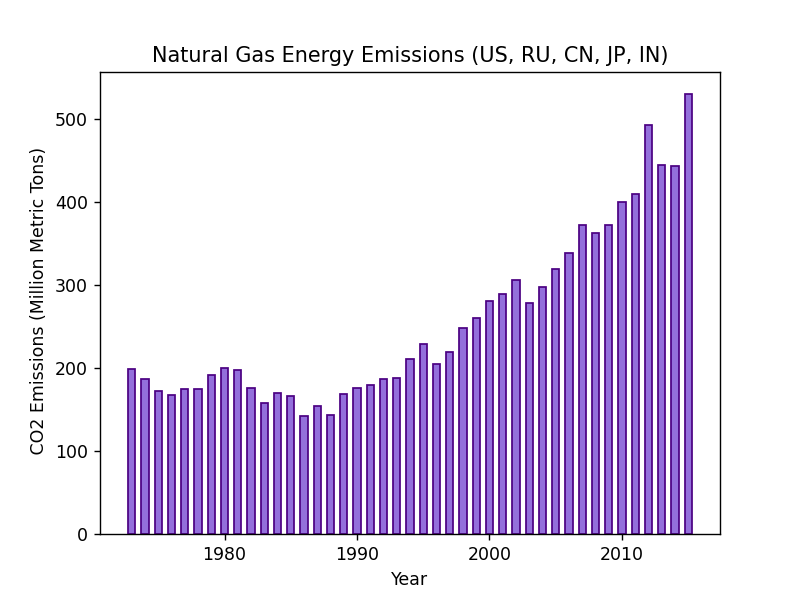

In [137]:
plt.figure(4)
x = naturalgas_electric_emissions_df["Year"]
y = naturalgas_electric_emissions_df["Value"]
plt.bar(x, y, color = 'mediumpurple', edgecolor = 'indigo', width = .55)
plt.xlabel("Year")
plt.ylabel(' CO2 Emissions (Million Metric Tons)')
plt.title('Natural Gas Energy Emissions (US, RU, CN, JP, IN)')
plt.show()

<IPython.core.display.Javascript object>


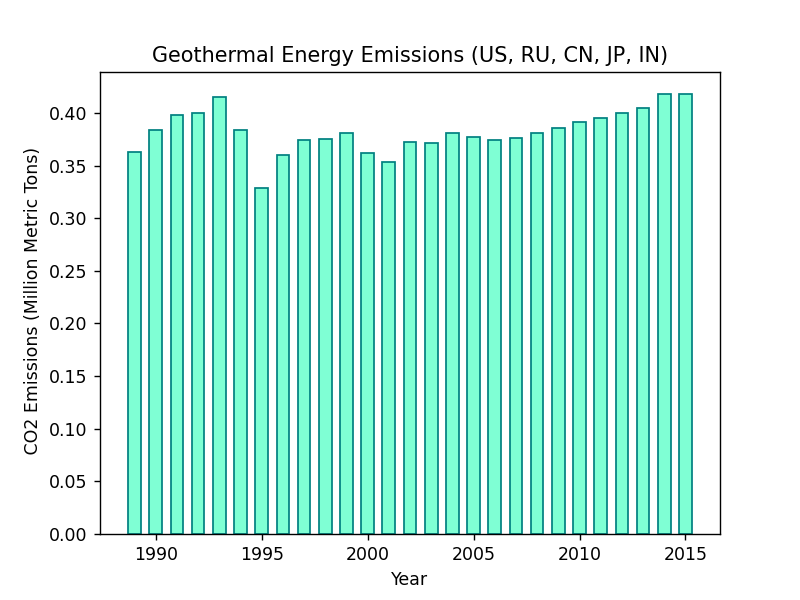

In [127]:
plt.figure(5)
x = geo_electric_emissions_df["Year"]
y = geo_electric_emissions_df["Value"]
plt.bar(x, y, color = 'aquamarine', edgecolor = 'teal', width = .60)
plt.xlabel("Year")
plt.ylabel(' CO2 Emissions (Million Metric Tons)')
plt.title('Geothermal Energy Emissions (US, RU, CN, JP, IN)')
plt.show()

<IPython.core.display.Javascript object>


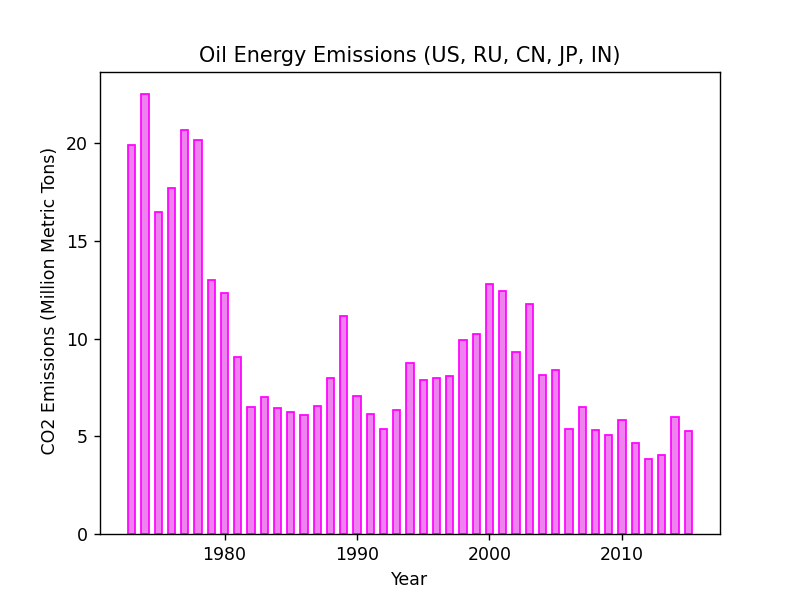

In [136]:
plt.figure(6)
x = oil_electric_emissions_df["Year"]
y = oil_electric_emissions_df["Value"]
plt.bar(x, y, color = 'violet', edgecolor = 'fuchsia', width = .55)
plt.xlabel("Year")
plt.ylabel(' CO2 Emissions (Million Metric Tons)')
plt.title('Oil Energy Emissions (US, RU, CN, JP, IN)')
plt.show()

<IPython.core.display.Javascript object>


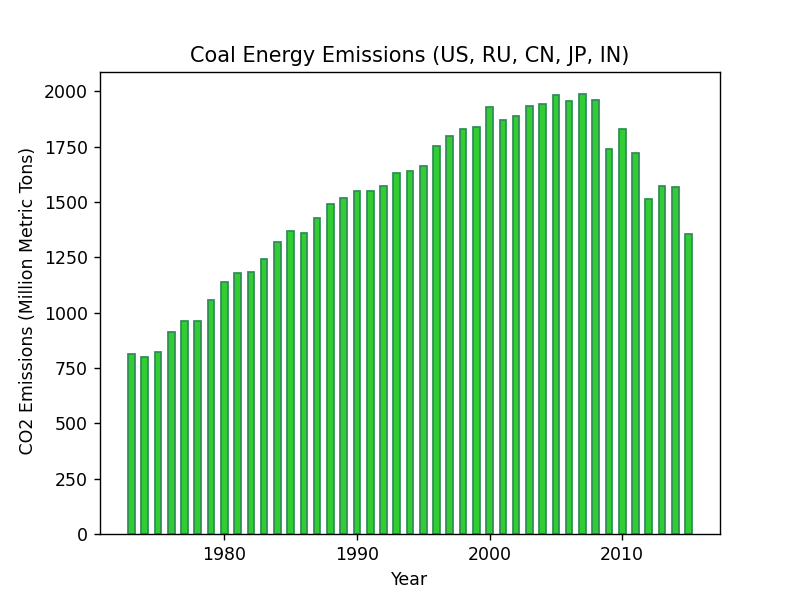

In [140]:
plt.figure(7)
x = coal_electric_emissions_df["Year"]
y = coal_electric_emissions_df["Value"]
plt.bar(x, y, color = 'limegreen', edgecolor = 'seagreen', width = .50)
plt.xlabel("Year")
plt.ylabel(' CO2 Emissions (Million Metric Tons)')
plt.title('Coal Energy Emissions (US, RU, CN, JP, IN)')
plt.show()